In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from sbc import ThinSBC, rmse_mean, rmse_averaged
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.figsize"] = "20, 10"

In [3]:
num_reps = 10000
data = dict(J=8, K=2, sigma = [15, 10, 16, 11,  9, 11, 10, 18])
sbc = ThinSBC(100, "../code/gen_8schools.stan", "../code/8schools.stan",

             dict(chains=1, iter=2300, warmup=1000), stats=[rmse_mean, rmse_averaged])
reps = sbc.run(data, num_reps)
reps.to_csv(str(sbc) + ".csv")

Using cached StanModel
Using cached StanModel
Using  24  cores.


/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issub

Redoing! needed 6227
Redoing! needed 2402
Redoing! needed 3129
run took 243.29010343551636s


In [4]:
reps.head()

,mu_n_eff,mu_order_stat,mu_prior,mu_rhat,mu_rmse_averaged,mu_rmse_mean,tau_n_eff,tau_order_stat,tau_prior,tau_rhat,tau_rmse_averaged,tau_rmse_mean,theta_n_eff,theta_order_stat,theta_prior,theta_rhat,theta_rmse_averaged,theta_rmse_mean
0,1190.0,97,-4.929305,0.999359,7.664719,6.738852,697.0,74,2.243735,1.002950,4.912821,3.127857,"[1052.0, 1300.0, 1175.0, 974.0, 1300.0, 1021.0...","[88, 67, 93, 91, 96, 79, 76, 94]","[-6.016123707682268, -1.8805191802782897, -4.1...","[1.0003324487959957, 0.9992826606420109, 1.002...",26.717726,"[8.568925055836274, 4.433320528432295, 6.71596..."
1,1117.0,6,5.715224,1.000571,6.295575,5.268112,853.0,4,9.169282,1.000796,5.932078,5.357075,"[741.0, 1118.0, 1300.0, 1300.0, 1300.0, 1197.0...","[73, 63, 71, 35, 0, 13, 6, 50]","[-5.007475845092317, -0.3081024040860152, -3.3...","[1.0028600969337476, 0.999240113351865, 0.9993...",22.307597,"[5.668118363353889, 0.9687449223475869, 4.0088..."
2,1300.0,61,-0.646733,1.000285,3.353034,0.606886,1056.0,16,6.001963,1.001413,4.100774,2.623398,"[1300.0, 1300.0, 1300.0, 1300.0, 1300.0, 1300....","[90, 2, 90, 22, 91, 11, 77, 17]","[-6.759835420026633, 8.510909298035367, -6.525...","[0.999490704503755, 1.0007045492101114, 0.9992...",21.706093,"[6.709172222915808, 8.56157249514619, 6.474407..."
3,1300.0,88,-5.637770,0.999963,6.001037,4.891134,922.0,37,5.104206,0.999627,3.069846,0.685756,"[1300.0, 1300.0, 1300.0, 1300.0, 1300.0, 1300....","[85, 79, 59, 63, 96, 62, 88, 82]","[-8.050461761736795, -3.703311299633374, -1.34...","[1.0003586948509076, 0.9994922687953228, 0.999...",21.294522,"[7.302253722757999, 2.955103260654578, 0.59484..."
4,1300.0,96,-7.084594,1.000035,6.572377,5.777300,1300.0,14,6.424805,0.999841,3.991906,3.108676,"[1300.0, 1300.0, 1300.0, 1300.0, 1300.0, 1300....","[91, 98, 85, 95, 93, 71, 87, 54]","[-6.673213800241708, -11.276464391402932, -7.0...","[0.9992600843575189, 0.9994533949830621, 1.000...",20.815104,"[5.124729869689766, 9.72798046085099, 5.503149..."


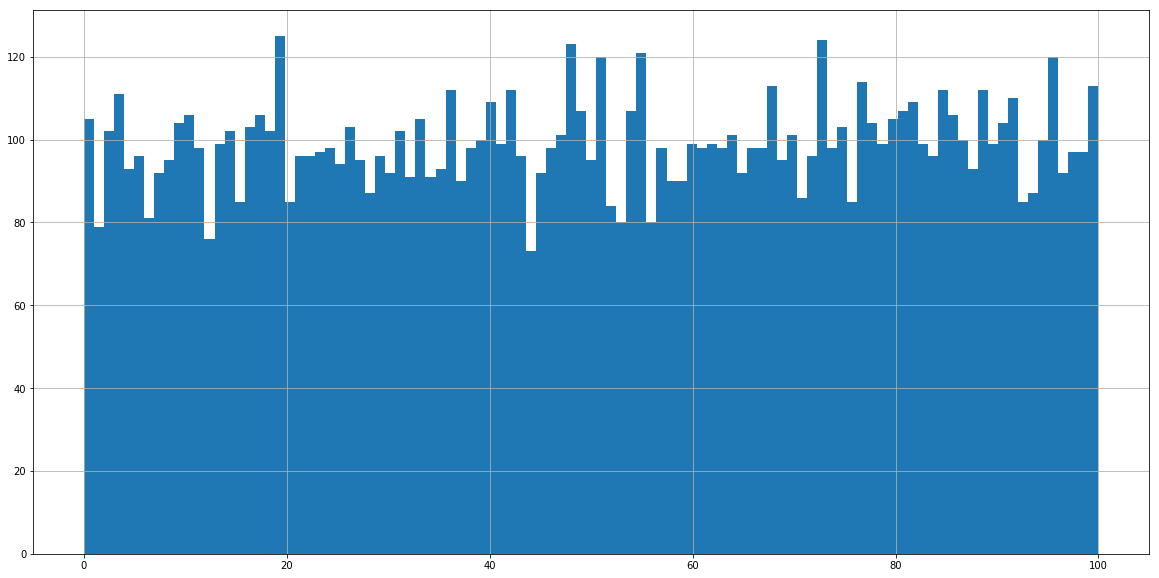

In [19]:
reps["tau_order_stat"].hist(bins=101)
plt.savefig("sbac_8schoolsncp_tau_100_thin.eps")

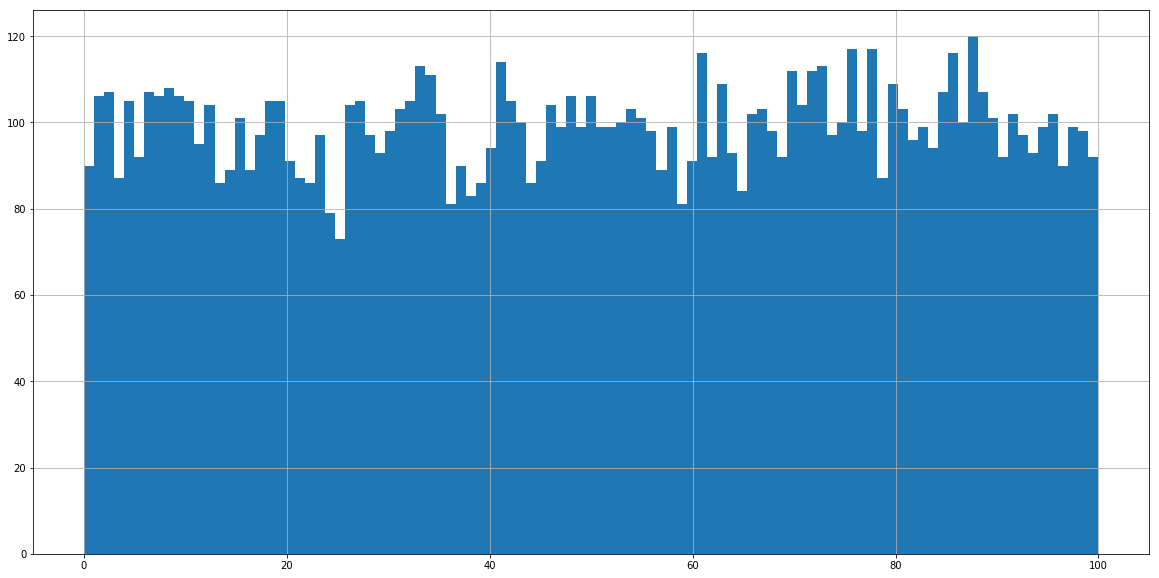

In [20]:
#reps["theta_order_stat"] = reps["theta_order_stat"].apply(lambda s: list(map(int, s[1:-1].split())))
pd.Series(([x[0] for x in reps["theta_order_stat"]])).hist(bins=101)
plt.savefig("sbac_8schoolsncp_theta1_100_thin.eps")

In [ ]:
reps